# Bibliotecas Usadas

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Gradiente descedente em um parâmtro da regressão linear

Considere os dados abaixo como resultado de uma pesquisa que analisa a quantidade de carros em uma família pelo sua renda medida em mil reais

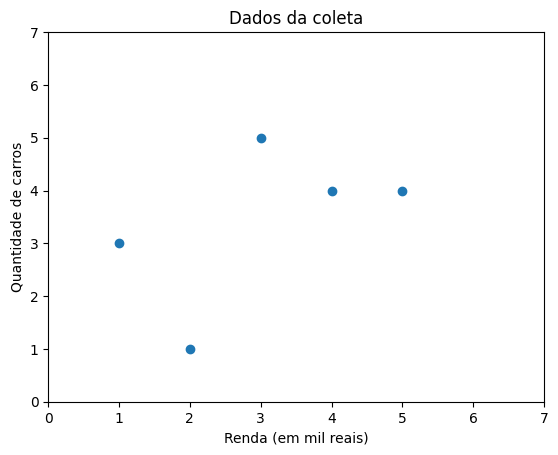

In [2]:
x = np.arange(1, 6)
y = [3, 1, 5, 4, 4]

plt.scatter(x, y)
plt.xlim(0, 7)
plt.ylim(0,7)

plt.title("Dados da coleta")
plt.xlabel("Renda (em mil reais)")
plt.ylabel("Quantidade de carros")

plt.show()

Deseja-se fazer uma regressão linear com esses dados. Considerando um bias de 0.8, necessita-se encontrar o intercept ideal. Logo usaremos o gradiente descendente para essa função. Primeiro, considero o intecerp = 0, depois encontro a função perda (loss) que será a diferença entre o resultado esperado e o resultado previsto

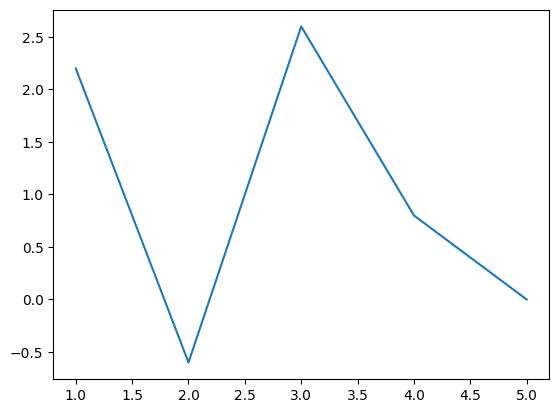

In [3]:
intercep = 0

previsto = lambda x, inter : np.array([0.8 * i + inter for i in x])
esperado = np.array(y)

loss = lambda prev, esp: esp-prev
plt.plot(x, loss(previsto(x, intercep),esperado))

Após encontrarmos a função loss, iremos elevar ao quadrado e somaremos todos os seus valores

Text(0, 0.5, 'Soma dos valores do residual')

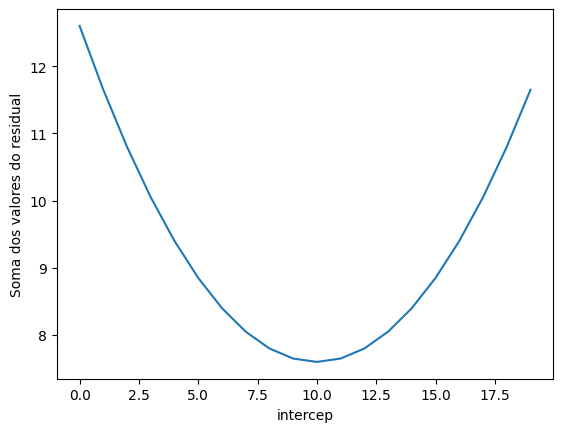

In [4]:
residual = lambda prev, esp : np.square(loss(prev, esp))
sum_residual = lambda prev, esp: np.sum(residual(prev, esp))
grafico_intercept = [sum_residual(previsto(x, i), esperado) for i in np.arange(0,2, 0.1)]
plt.plot(grafico_intercept)
plt.xlabel("intercep")
plt.ylabel("Soma dos valores do residual")

Para encontrarmos o intercept que minimiza a soma dos quadrados da diferença (residual), usaremos as derivadas para chegar ao resultado que queremos

In [5]:
gradiente = np.gradient(residual(previsto(x, intercep), esperado), x)
gradiente

array([-4.48,  0.96,  0.14, -3.38, -0.64])

Somaremos os valores encontrados e multiplicaresmo pelo hiperparâmetro coeficiente de aprendizado definido como 0.1

In [6]:
new_intercep = np.sum(gradiente) * 0.1
new_intercep

np.float64(-0.7400000000000002)

Por último esse new intercep é subtraído do intercept atual

In [7]:
intercep -= new_intercep

Tudo o que fizemos foi didático, implementeando passo a passo, porém precisamos de um algoritmo que faça isso de forma interativa até que uma condição seja atinjida: ou que a diferença entre o passo anterior e o próximo passo seja ínfima ou que um determinado número de passos ocorra, vamos fazer os dois

Número de passos pré definido

In [8]:
x = np.arange(1, 6)
y = [3, 1, 5, 4, 4]

intercep = 0

previsto = lambda x : np.array([0.8 * i + intercep for i in x])
esperado = np.array(y)

loss = lambda prev, esp: np.array(esp-prev(x))
residual = lambda prev, esp: np.square(loss(prev, esp))

In [9]:
def plotar():
    
    plt.plot(x, previsto(x))
    plt.scatter(x, y)
    plt.xlim(0, 7)
    plt.ylim(0,7)

    plt.title("Regressão Linear")
    plt.xlabel("Renda (em mil reais)")
    plt.ylabel("Quantidade de carros")

    plt.show()

Intercept:  0


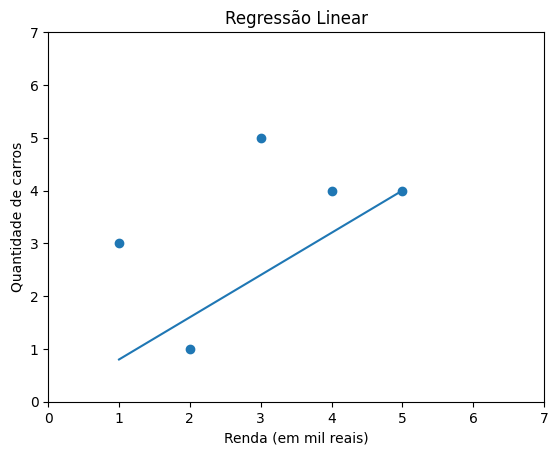

Intercept:  0
Passo: -0.7400000000000002
Novo intercep:  0.7400000000000002


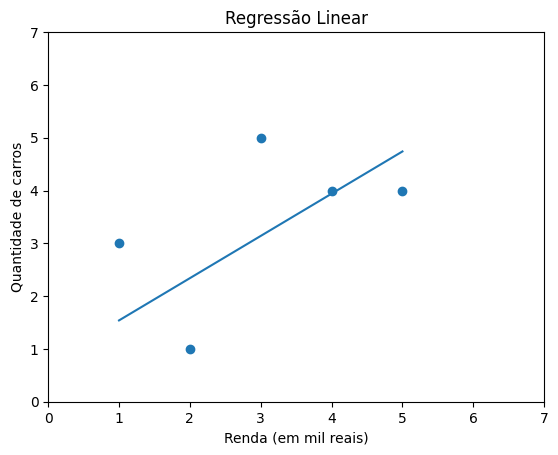

Intercept:  0.7400000000000002
Passo: -0.14799999999999977
Novo intercep:  0.888


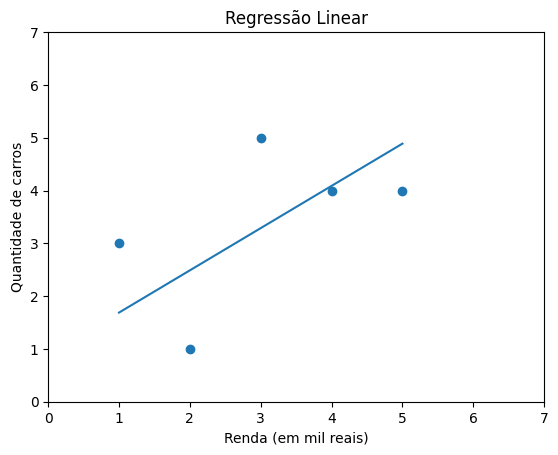

Intercept:  0.888
Passo: -0.02959999999999995
Novo intercep:  0.9176


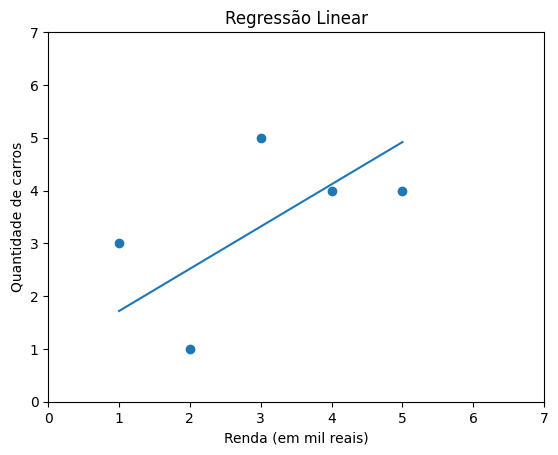

Intercept:  0.9176
Passo: -0.005919999999999959
Novo intercep:  0.9235199999999999


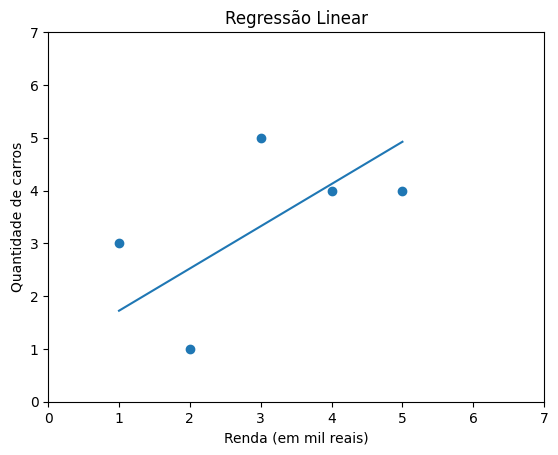

Intercept:  0.9235199999999999
Passo: -0.0011840000000000852
Novo intercep:  0.924704


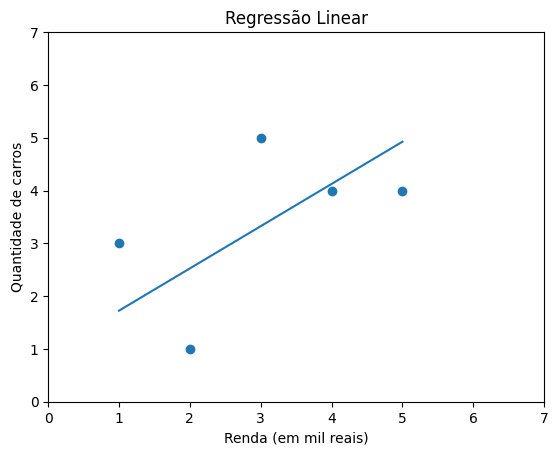

Intercept:  0.924704
Passo: -0.0002368000000000037
Novo intercep:  0.9249408


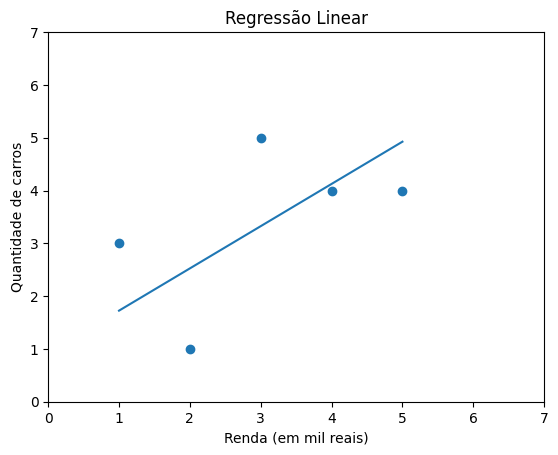

Intercept:  0.9249408
Passo: -4.7359999999985194e-05
Novo intercep:  0.92498816


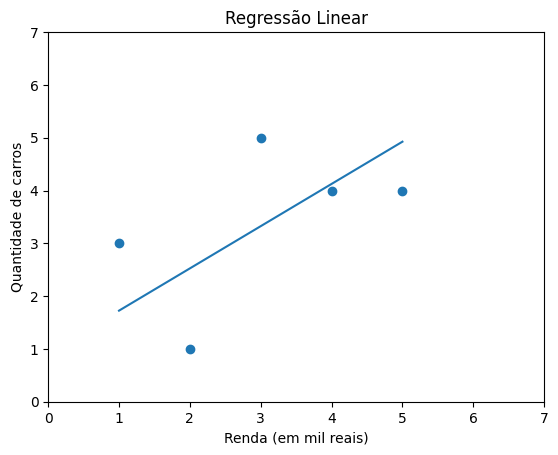

Intercept:  0.92498816
Passo: -9.472000000043668e-06
Novo intercep:  0.924997632


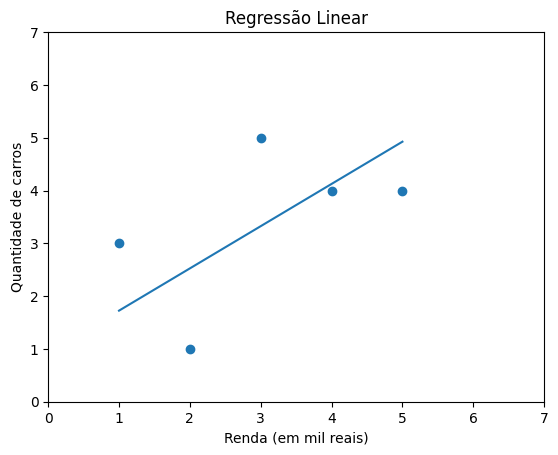

Intercept:  0.924997632
Passo: -1.89439999999097e-06
Novo intercep:  0.9249995263999999


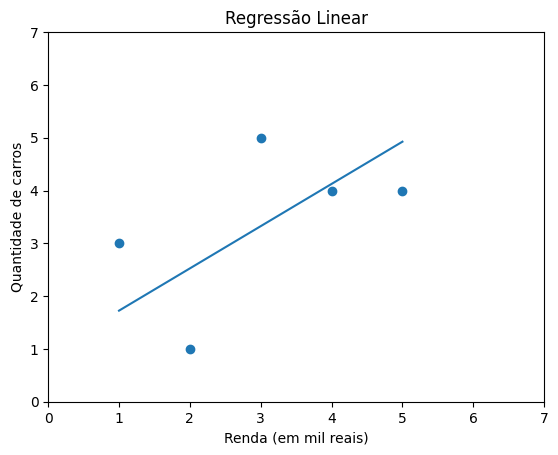

Intercept:  0.9249995263999999
Passo: -3.7888000005148474e-07
Novo intercep:  0.92499990528


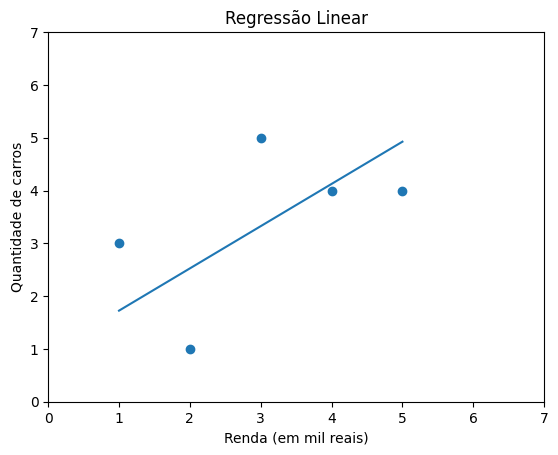

Intercept:  0.92499990528
Passo: -7.577599996366758e-08
Novo intercep:  0.9249999810559999


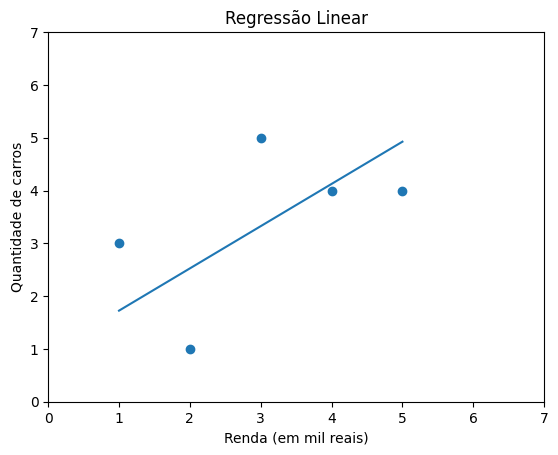

In [10]:
print("Intercept: ",intercep)
plotar()
for _ in range(11):
    print("Intercept: ",intercep)
    res = residual(previsto, esperado)
    gradiente = np.gradient(res, x)
    new_intercep = np.sum(gradiente) * 0.1
    print("Passo:" ,new_intercep)
    intercep -= new_intercep
    print("Novo intercep: ", intercep)
    plotar()


Por diferença entre cada iteração

In [11]:
x = np.arange(1, 6)
y = [3, 1, 5, 4, 4]

intercep = 0

previsto = lambda x : np.array([0.8 * i + intercep for i in x])
esperado = np.array(y)

loss = lambda prev, esp: np.array(esp-prev(x))
residual = lambda prev, esp: np.square(loss(prev, esp))

Intercept:  0


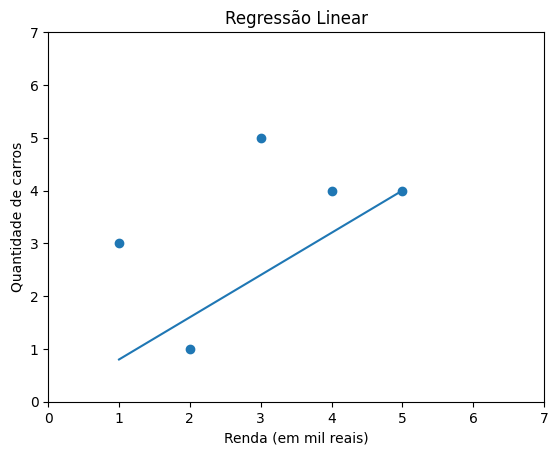

Intercept:  0
Passo: -0.7400000000000002
Novo intercep:  0.7400000000000002


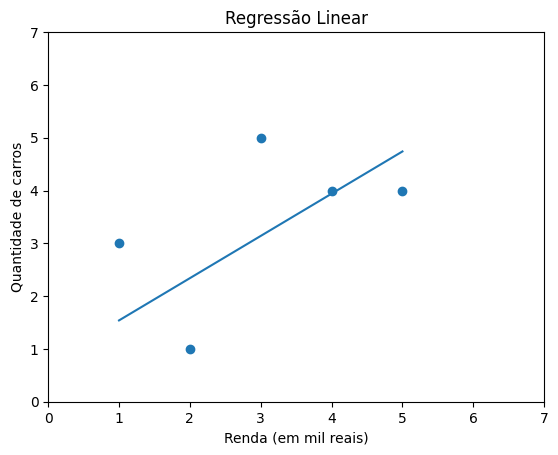

Intercept:  0.7400000000000002
Passo: -0.14799999999999977
Novo intercep:  0.888


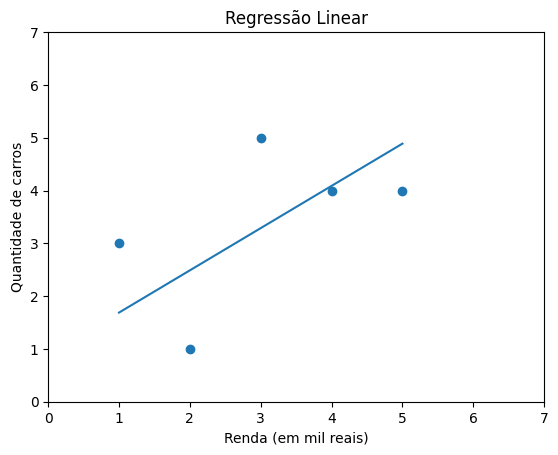

Intercept:  0.888
Passo: -0.02959999999999995
Novo intercep:  0.9176


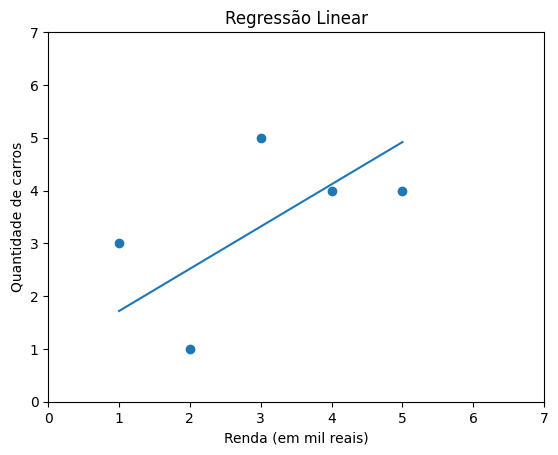

Intercept:  0.9176
Passo: -0.005919999999999959
Novo intercep:  0.9235199999999999


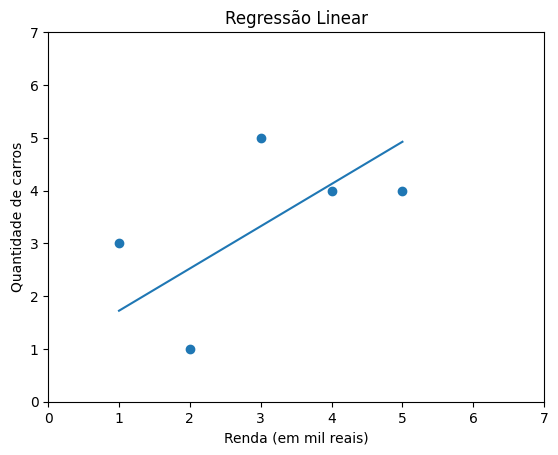

Intercept:  0.9235199999999999
Passo: -0.0011840000000000852
Novo intercep:  0.924704


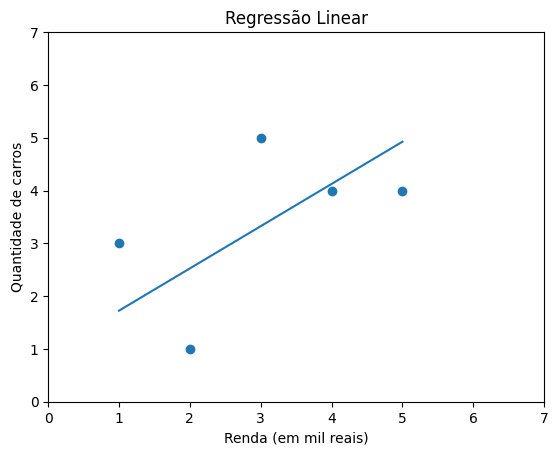

Intercept:  0.924704
Passo: -0.0002368000000000037
Novo intercep:  0.9249408


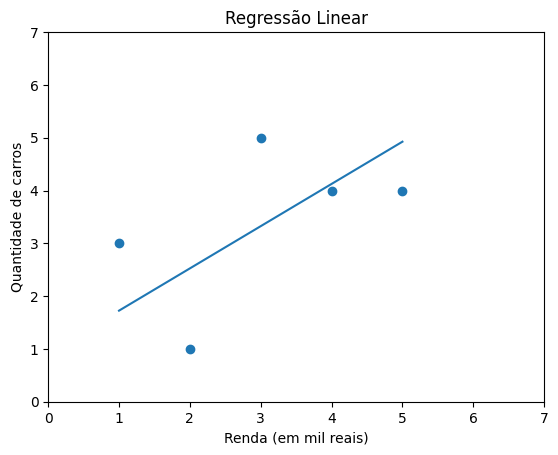

In [12]:
print("Intercept: ",intercep)
plotar()
loop = True
while loop:
    print("Intercept: ",intercep)
    res = residual(previsto, esperado)
    gradiente = np.gradient(res, x)
    new_intercep = np.sum(gradiente) * 0.1
    print("Passo:" ,new_intercep)
    intercep -= new_intercep
    if (new_intercep)**2 < (0.001)**2:
        loop = False
    print("Novo intercep: ", intercep)
    plotar()


Esses valores foram encontrados usando o coefinciente de aprendizado, mas vamos tentar alterar um pouco esse valor nos algortimo do número de passos vamos mudar para 0.3

In [13]:
x = np.arange(1, 6)
y = [3, 1, 5, 4, 4]

intercep = 0
learning_rate = 0.3

previsto = lambda x : np.array([0.8 * i + intercep for i in x])
esperado = np.array(y)

loss = lambda prev, esp: np.array(esp-prev(x))
residual = lambda prev, esp: np.square(loss(prev, esp))

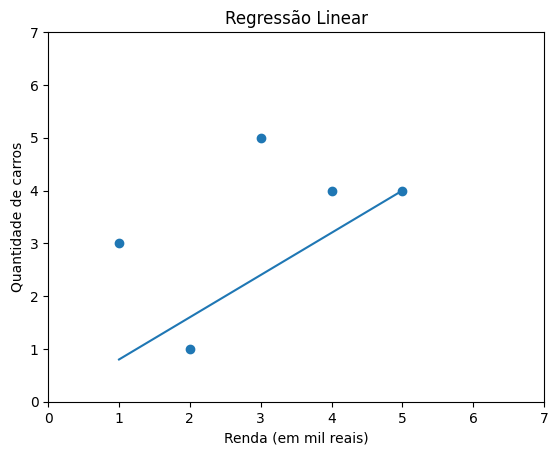

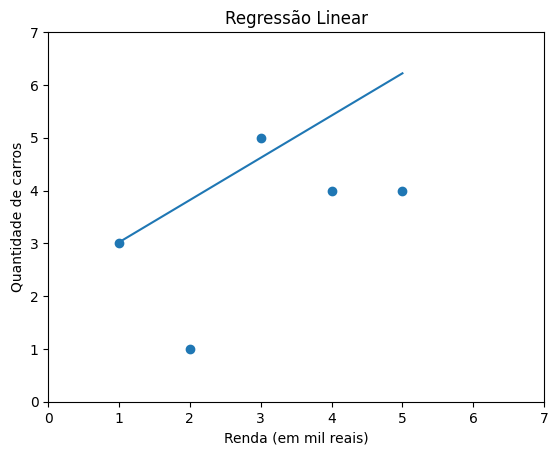

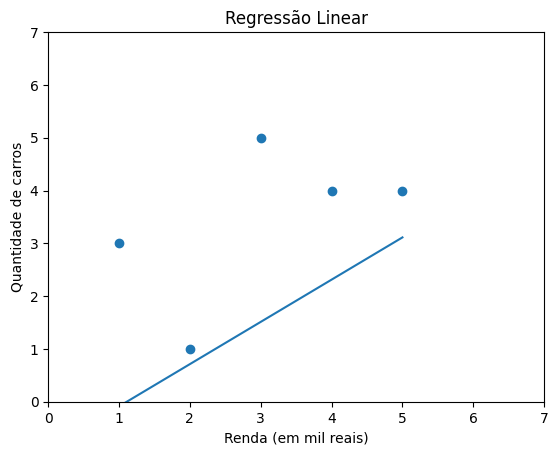

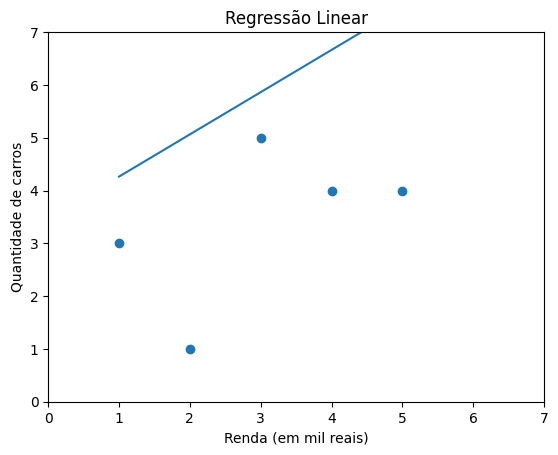

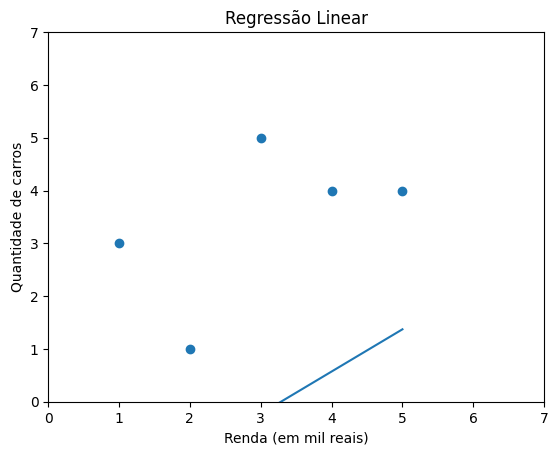

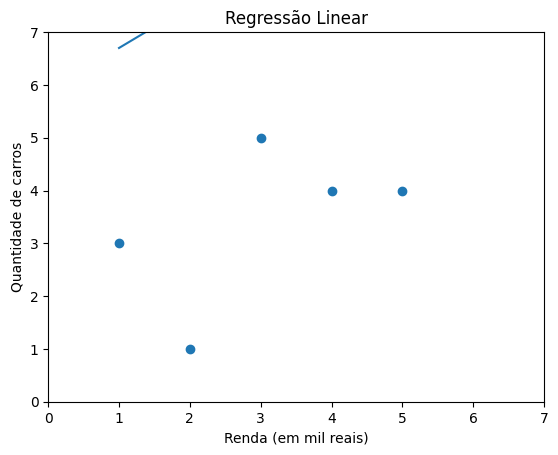

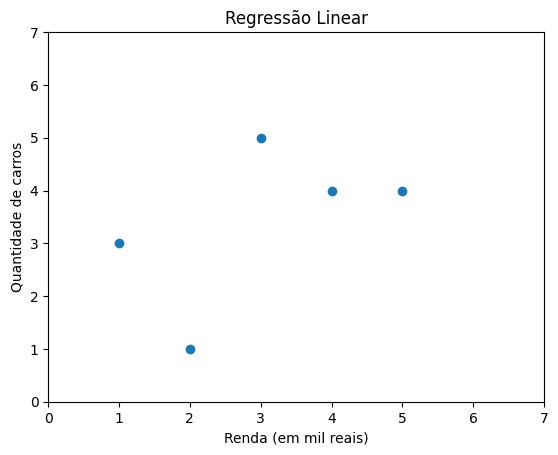

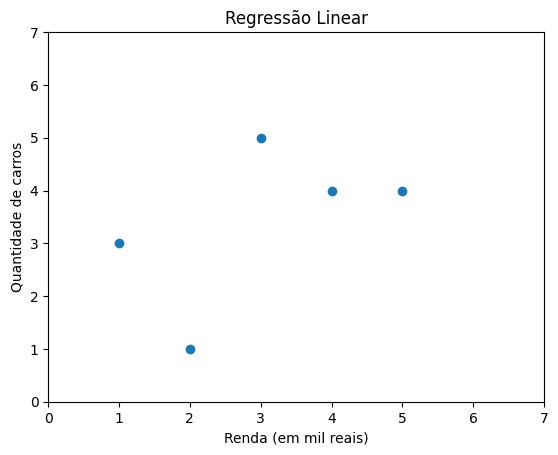

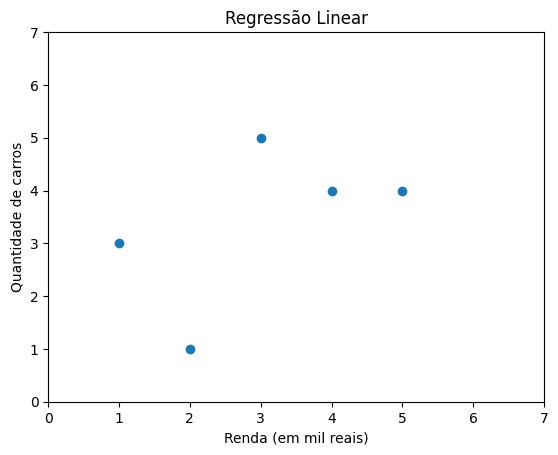

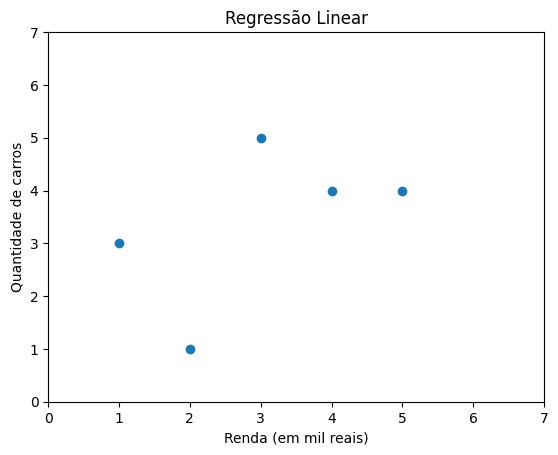

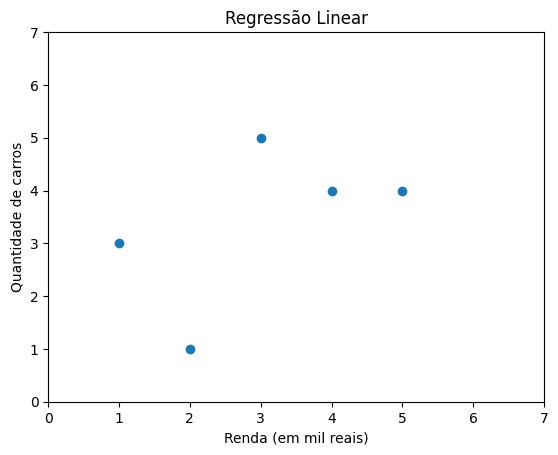

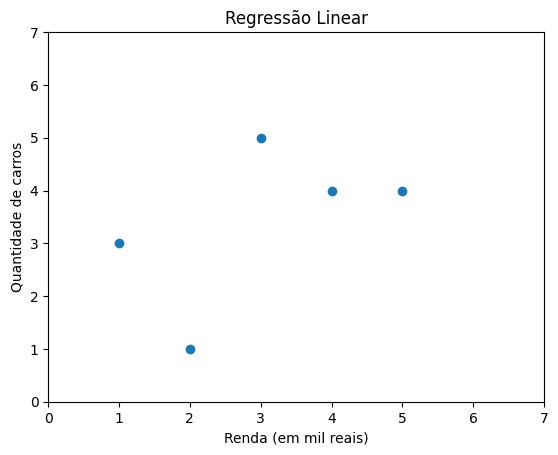

In [14]:
for _ in range(11):
    plotar()
    res = residual(previsto, esperado)
    gradiente = np.gradient(res, x)
    new_intercep = np.sum(gradiente) * learning_rate
    intercep -= new_intercep
else:
    plotar()

Percebe-se que o alogoritmo divergiu aumento para 0.3, vamos agora diminuir para 0.05

In [15]:
x = np.arange(1, 6)
y = [3, 1, 5, 4, 4]

intercep = 0
learning_rate = 0.05

previsto = lambda x : np.array([0.8 * i + intercep for i in x])
esperado = np.array(y)

loss = lambda prev, esp: np.array(esp-prev(x))
residual = lambda prev, esp: np.square(loss(prev, esp))

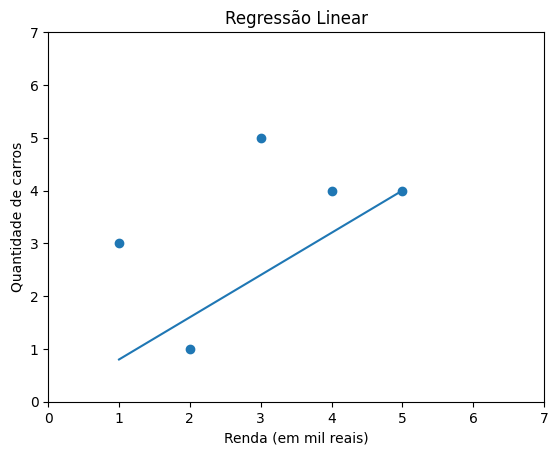

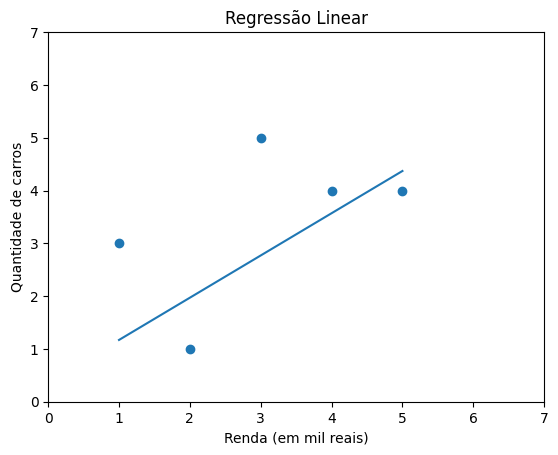

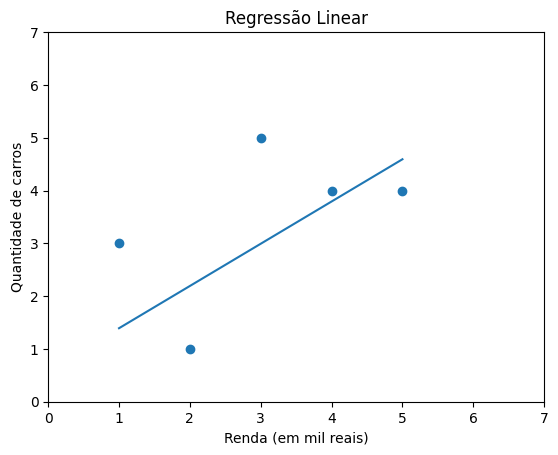

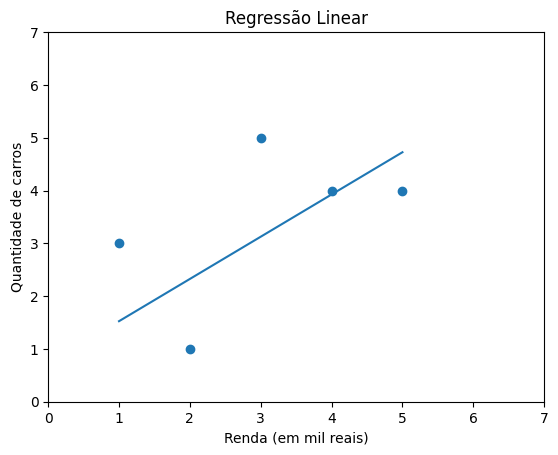

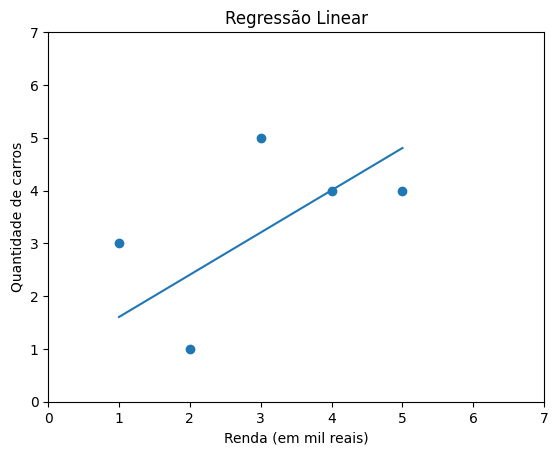

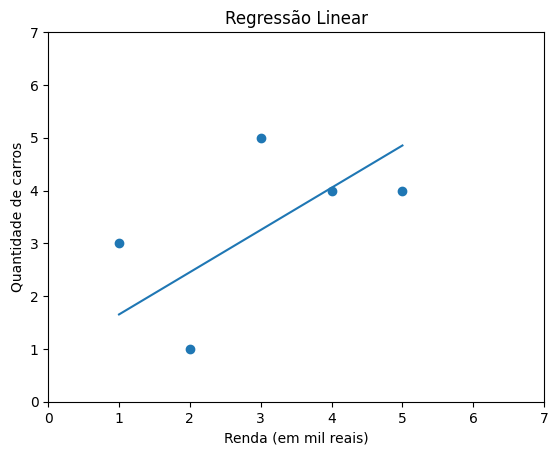

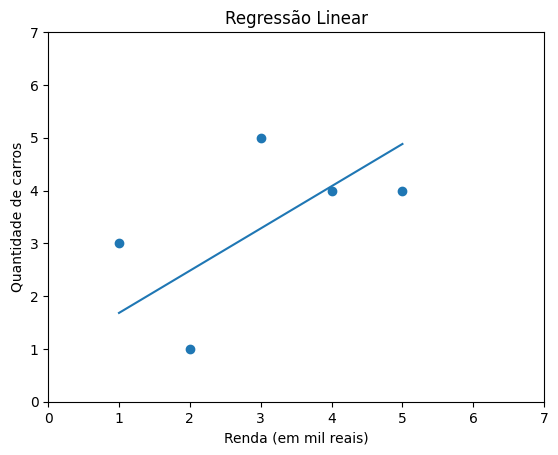

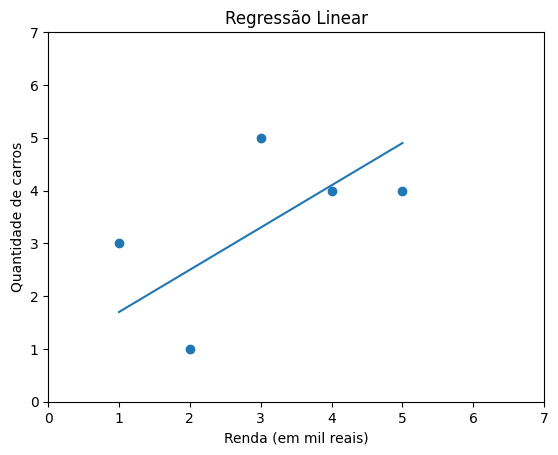

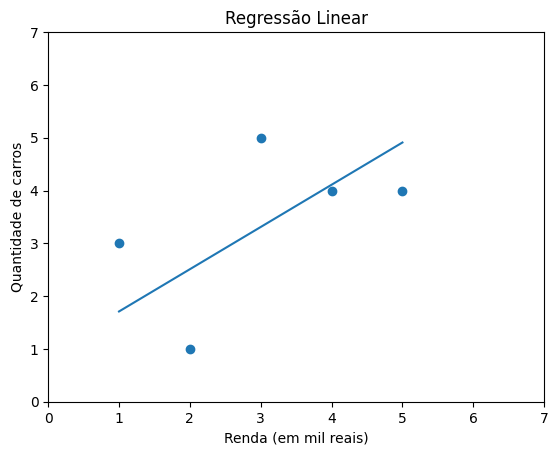

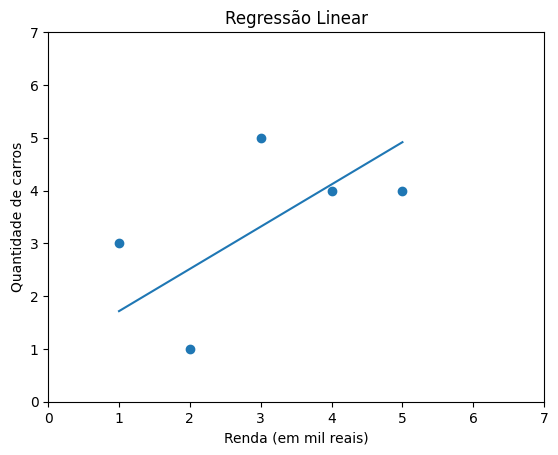

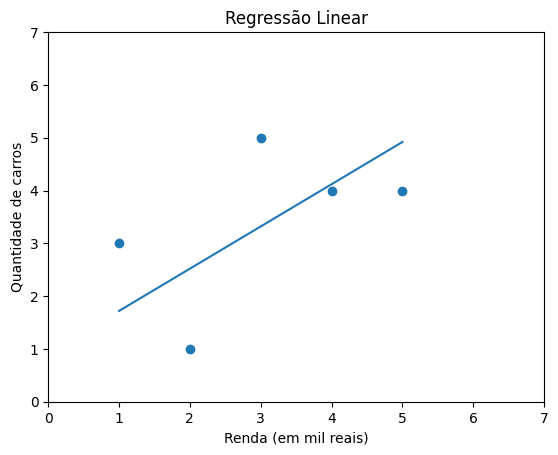

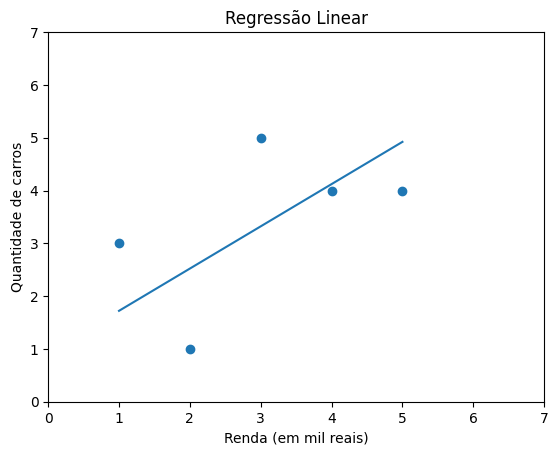

In [16]:
for _ in range(11):
    plotar()
    res = residual(previsto, esperado)
    gradiente = np.gradient(res, x)
    new_intercep = np.sum(gradiente) * learning_rate
    intercep -= new_intercep
else:
    plotar()

Percebe-se que o gradiente descentende ainda funciona, mas precisa de mais iterações para chegar a um resultado mais próximo. Essa é a importância do coeficiente de aprendizado, ele conduz o gradiente até o mínimo do residual, e otimizando o coeficiente, é possível chagar em resultados ótimos em poucas iterações